In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
dataset= pd.read_csv("/Users/snehshah/Desktop/USC/Projects/Course Recommendation System/EdX.csv")

In [3]:
dataset

,Name,University,Difficulty Level,Link,About,Course Description
0,How to Learn Online,edX,Beginner,https://www.edx.org/course/how-to-learn-online,Learn essential strategies for successful onli...,"Designed for those who are new to elearning, t..."
1,Programming for Everybody (Getting Started wit...,The University of Michigan,Beginner,https://www.edx.org/course/programming-for-eve...,"This course is a ""no prerequisite"" introductio...",This course aims to teach everyone the basics ...
2,CS50's Introduction to Computer Science,Harvard University,Beginner,https://www.edx.org/course/cs50s-introduction-...,An introduction to the intellectual enterprise...,"This is CS50x , Harvard University's introduct..."
3,The Analytics Edge,Massachusetts Institute of Technology,Intermediate,https://www.edx.org/course/the-analytics-edge,"Through inspiring examples and stories, discov...","In the last decade, the amount of data availab..."
4,Marketing Analytics: Marketing Measurement Str...,"University of California, Berkeley",Beginner,https://www.edx.org/course/marketing-analytics...,This course is part of a MicroMasters® Program,Begin your journey in a new career in marketin...
...,...,...,...,...,...,...
715,Global China: From the Mongols to the Ming,Harvard University,Beginner,https://www.edx.org/course/global-china-from-t...,Explore the impact of the conquest dynasties a...,"In the 13th century, by force of arms, the Mon..."
716,Leaders in Citizen Security and Justice Manage...,Inter-American Development Bank,Intermediate,https://www.edx.org/course/leaders-in-citizen-...,"Learn about the latest in prevention, police a...",The high rates of crime and violence are two o...
717,Computational Neuroscience: Neuronal Dynamics ...,École polytechnique fédérale de Lausanne,Advanced,https://www.edx.org/course/computational-neuro...,This course explains the mathematical and comp...,What happens in your brain when you make a dec...
718,Cities and the Challenge of Sustainable Develo...,SDG Academy,Beginner,https://www.edx.org/course/cities-and-the-chal...,What is a sustainable city? Learn the basics h...,"According to the United Nations, urbanization ..."


In [4]:
dataset.columns

Index(['Name', 'University', 'Difficulty Level', 'Link', 'About',
       'Course Description'],
      dtype='object')

In [5]:
dataset.shape

(720, 6)

In [6]:
dataset.size

4320

In [7]:
dataset.describe

<bound method NDFrame.describe of                                                   Name  \
0                                  How to Learn Online   
1    Programming for Everybody (Getting Started wit...   
2              CS50's Introduction to Computer Science   
3                                   The Analytics Edge   
4    Marketing Analytics: Marketing Measurement Str...   
..                                                 ...   
715         Global China: From the Mongols to the Ming   
716  Leaders in Citizen Security and Justice Manage...   
717  Computational Neuroscience: Neuronal Dynamics ...   
718  Cities and the Challenge of Sustainable Develo...   
719                      MathTrackX: Special Functions   

                                   University Difficulty Level  \
0                                         edX         Beginner   
1                  The University of Michigan         Beginner   
2                          Harvard University         Beginner   
3    

In [8]:
dataset['University']

0                                           edX
1                    The University of Michigan
2                            Harvard University
3         Massachusetts Institute of Technology
4            University of California, Berkeley
                         ...                   
715                          Harvard University
716             Inter-American Development Bank
717    École polytechnique fédérale de Lausanne
718                                 SDG Academy
719                      University of Adelaide
Name: University, Length: 720, dtype: object

In [9]:
print (dataset[0:5]['University'])

0                                      edX
1               The University of Michigan
2                       Harvard University
3    Massachusetts Institute of Technology
4       University of California, Berkeley
Name: University, dtype: object


In [10]:
dataset.isnull().values.any()

False

In [11]:
dataset.isnull().sum()

Name                  0
University            0
Difficulty Level      0
Link                  0
About                 0
Course Description    0
dtype: int64

In [12]:
dataset.drop(['Link'], axis=1)

,Name,University,Difficulty Level,About,Course Description
0,How to Learn Online,edX,Beginner,Learn essential strategies for successful onli...,"Designed for those who are new to elearning, t..."
1,Programming for Everybody (Getting Started wit...,The University of Michigan,Beginner,"This course is a ""no prerequisite"" introductio...",This course aims to teach everyone the basics ...
2,CS50's Introduction to Computer Science,Harvard University,Beginner,An introduction to the intellectual enterprise...,"This is CS50x , Harvard University's introduct..."
3,The Analytics Edge,Massachusetts Institute of Technology,Intermediate,"Through inspiring examples and stories, discov...","In the last decade, the amount of data availab..."
4,Marketing Analytics: Marketing Measurement Str...,"University of California, Berkeley",Beginner,This course is part of a MicroMasters® Program,Begin your journey in a new career in marketin...
...,...,...,...,...,...
715,Global China: From the Mongols to the Ming,Harvard University,Beginner,Explore the impact of the conquest dynasties a...,"In the 13th century, by force of arms, the Mon..."
716,Leaders in Citizen Security and Justice Manage...,Inter-American Development Bank,Intermediate,"Learn about the latest in prevention, police a...",The high rates of crime and violence are two o...
717,Computational Neuroscience: Neuronal Dynamics ...,École polytechnique fédérale de Lausanne,Advanced,This course explains the mathematical and comp...,What happens in your brain when you make a dec...
718,Cities and the Challenge of Sustainable Develo...,SDG Academy,Beginner,What is a sustainable city? Learn the basics h...,"According to the United Nations, urbanization ..."


In [13]:
print(f"There are {dataset.shape[0]} courses and {dataset.shape[1]} features in this dataset.")

There are 720 courses and 6 features in this dataset.


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
columns = ['University','Difficulty Level']
for i in columns:
    print(i , "-->",dataset[i].unique(), "\n")

University --> ['edX' 'The University of Michigan' 'Harvard University'
 'Massachusetts Institute of Technology'
 'University of California, Berkeley' 'University of Adelaide'
 'The University of Queensland' 'Curtin University'
 'Technische Universität München' 'National Research Nuclear University'
 'SDG Academy' 'University of Hong Kong' 'IBM'
 'Wageningen University & Research' 'Boston University'
 'Educational Testing Service' 'Universitat Politècnica de Valencia'
 'The Linux Foundation' 'Indian Institute of Management Bangalore'
 'The Georgia Institute of Technology' 'New York University'
 'The World Wide Web Consortium (W3C)' 'Columbia University'
 'Stanford University' 'Cornell University' 'Davidson College'
 'Berklee College of Music' 'The Hong Kong Polytechnic University'
 'University of Washington' 'Dartmouth_IMTx-Dartmouth College-IMT'
 'University of Pennsylvania' 'United Arab Emirates University'
 'The University of California, San Diego' 'MandarinX'
 'Tsinghua University'

In [16]:
dataset = dataset.drop_duplicates()
print(dataset)

                                                  Name  \
0                                  How to Learn Online   
1    Programming for Everybody (Getting Started wit...   
2              CS50's Introduction to Computer Science   
3                                   The Analytics Edge   
4    Marketing Analytics: Marketing Measurement Str...   
..                                                 ...   
715         Global China: From the Mongols to the Ming   
716  Leaders in Citizen Security and Justice Manage...   
717  Computational Neuroscience: Neuronal Dynamics ...   
718  Cities and the Challenge of Sustainable Develo...   
719                      MathTrackX: Special Functions   

                                   University Difficulty Level  \
0                                         edX         Beginner   
1                  The University of Michigan         Beginner   
2                          Harvard University         Beginner   
3       Massachusetts Institute of Tech

In [17]:
dataset.describe

<bound method NDFrame.describe of                                                   Name  \
0                                  How to Learn Online   
1    Programming for Everybody (Getting Started wit...   
2              CS50's Introduction to Computer Science   
3                                   The Analytics Edge   
4    Marketing Analytics: Marketing Measurement Str...   
..                                                 ...   
715         Global China: From the Mongols to the Ming   
716  Leaders in Citizen Security and Justice Manage...   
717  Computational Neuroscience: Neuronal Dynamics ...   
718  Cities and the Challenge of Sustainable Develo...   
719                      MathTrackX: Special Functions   

                                   University Difficulty Level  \
0                                         edX         Beginner   
1                  The University of Michigan         Beginner   
2                          Harvard University         Beginner   
3    

In [18]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'Difficulty Level'. 
dataset['Difficulty Level']= label_encoder.fit_transform(dataset['Difficulty Level']) 
print(dataset.head())

                                                Name  \
0                                How to Learn Online   
1  Programming for Everybody (Getting Started wit...   
2            CS50's Introduction to Computer Science   
3                                 The Analytics Edge   
4  Marketing Analytics: Marketing Measurement Str...   

                              University  Difficulty Level  \
0                                    edX                 1   
1             The University of Michigan                 1   
2                     Harvard University                 1   
3  Massachusetts Institute of Technology                 2   
4     University of California, Berkeley                 1   

                                                Link  \
0     https://www.edx.org/course/how-to-learn-online   
1  https://www.edx.org/course/programming-for-eve...   
2  https://www.edx.org/course/cs50s-introduction-...   
3      https://www.edx.org/course/the-analytics-edge   
4  https:/

/var/folders/9p/krt4vhn17ls6fxrd79rqftk00000gn/T/ipykernel_7076/1188334020.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Difficulty Level']= label_encoder.fit_transform(dataset['Difficulty Level'])


In [19]:
dataset['Difficulty Level'].value_counts()

1    437
2    204
0     78
Name: Difficulty Level, dtype: int64

In [20]:
uni = " ".join(text for text in dataset.University)
uni = uni.replace(',', ' ')
print (f"There are {len(uni)} words in the combination of all Universities.")

There are 19466 words in the combination of all Universities.


In [21]:
gp_uni = dataset.groupby('University').count().reset_index()
gp_uni.sort_values(by= 'Name',ascending=False, inplace=True)
gp_uni.head()

,University,Name,Difficulty Level,Link,About,Course Description
24,Harvard University,90,90,90,90,90
36,Massachusetts Institute of Technology,41,41,41,41,41
17,Delft University of Technology,28,28,28,28,28
65,The University of Queensland,25,25,25,25,25
25,IBM,21,21,21,21,21


Text(0.5, 1.0, 'top 20 Universities offered most courses on EdX')

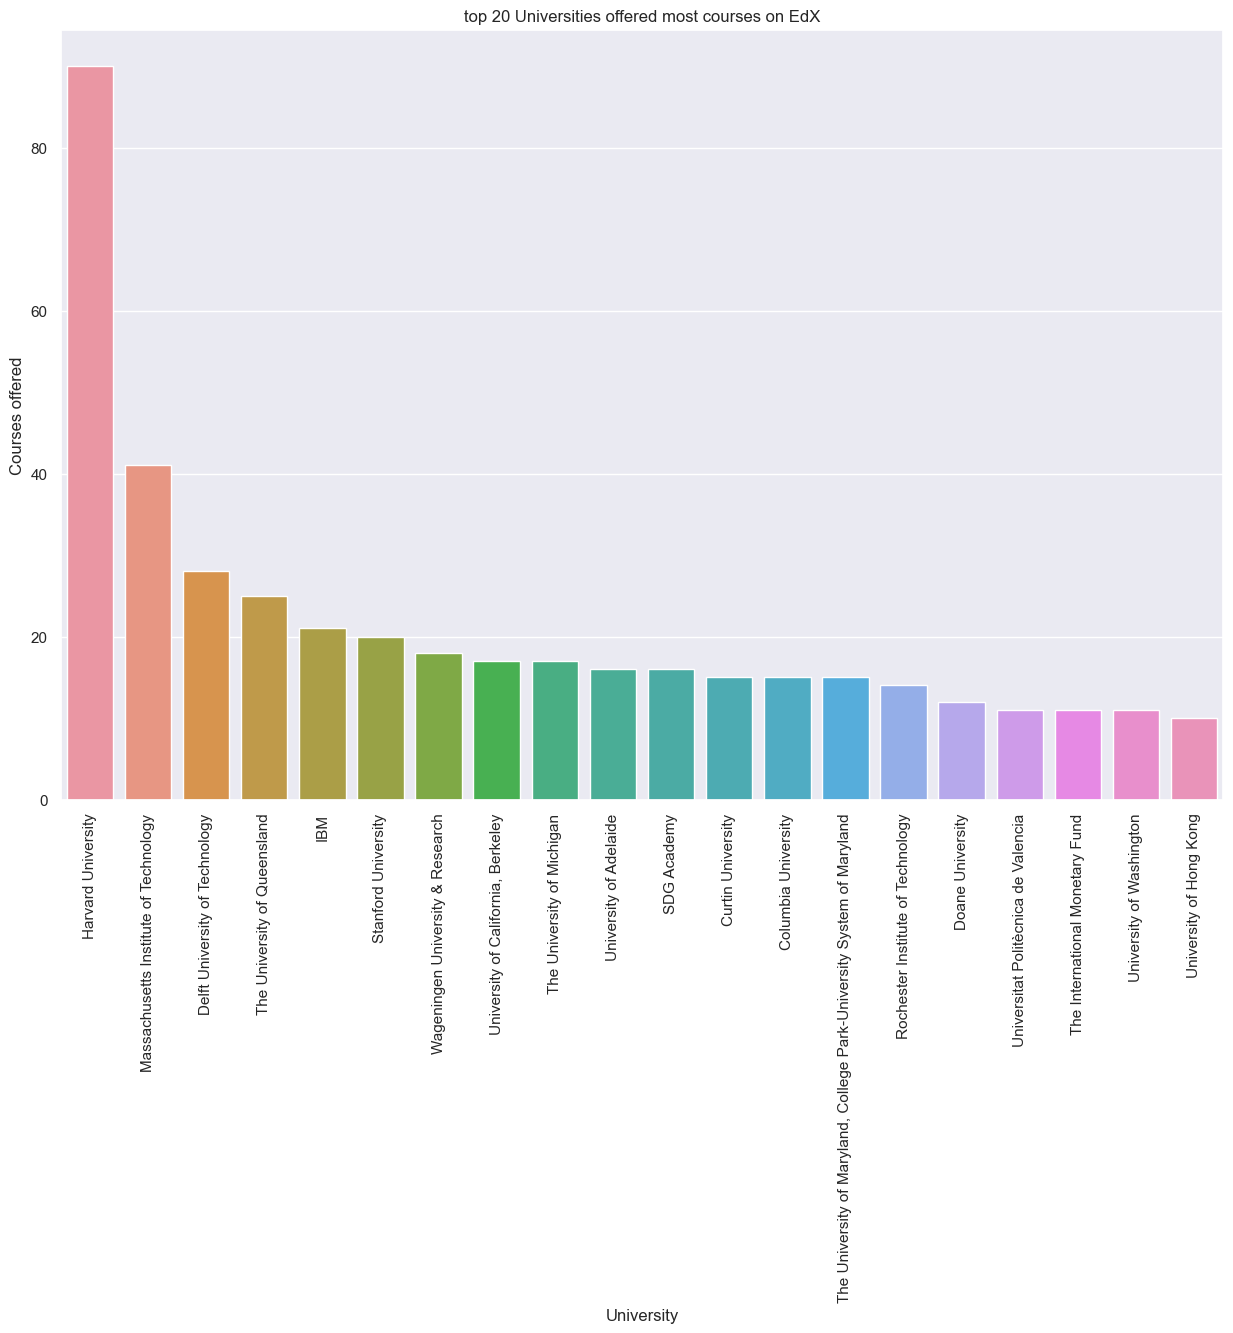

In [22]:
sns.set(rc={'figure.figsize':(15,10)})
fig = plt.figure()
sns.barplot(x='University', y='Name',data=gp_uni[:20])
plt.xticks(rotation=90)
plt.ylabel('Courses offered')
plt.title('top 20 Universities offered most courses on EdX')

In [23]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [24]:
from wordcloud import WordCloud, STOPWORDS

In [25]:
first_course_name = dataset.Name[1]
print(f"The name of the second course in the data is: {dataset.Name[1]}")

The name of the second course in the data is: Programming for Everybody (Getting Started with Python)


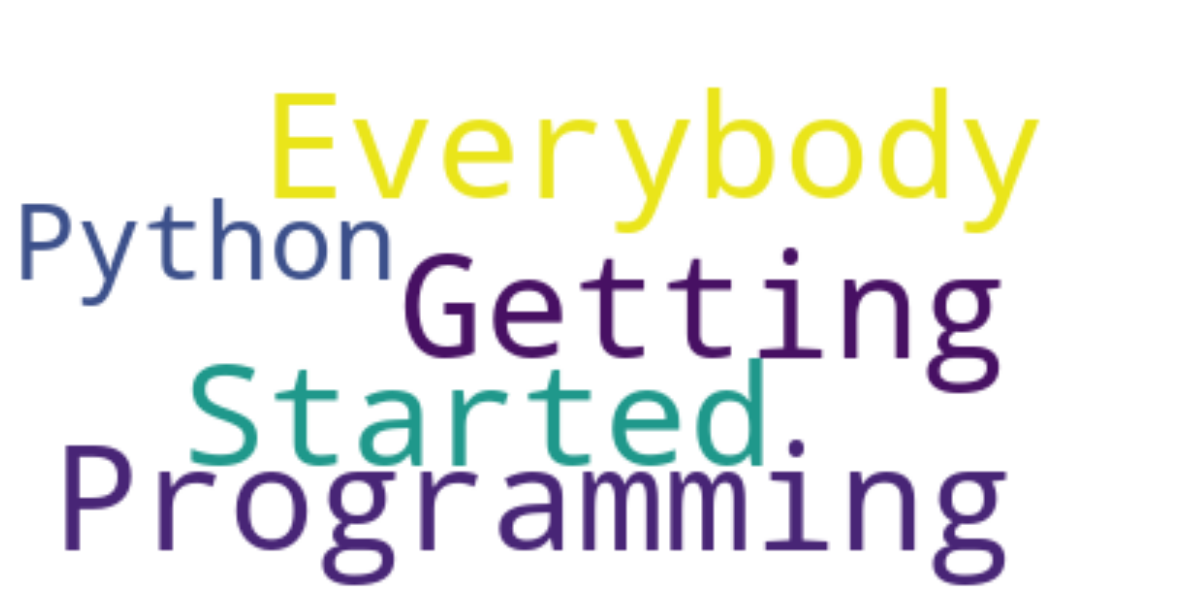

In [26]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(first_course_name)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [27]:
text = " ".join(name for name in dataset.Name)
print (f"There are {len(text)} words in the combination of all Course Name.")

There are 29424 words in the combination of all Course Name.


In [28]:
stopwords = set(STOPWORDS)
stopwords.update(["will", "learn","learning","understanding","understand"])

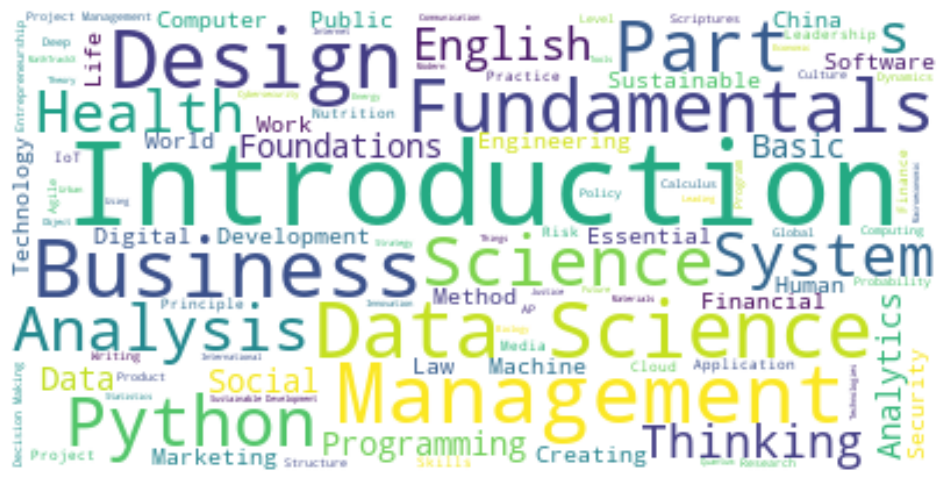

In [29]:
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [30]:
course_description_text = " ".join(text for text in dataset['Course Description'])
print (f"There are {len(course_description_text)} words in the combination of all Course Description.")

There are 880187 words in the combination of all Course Description.


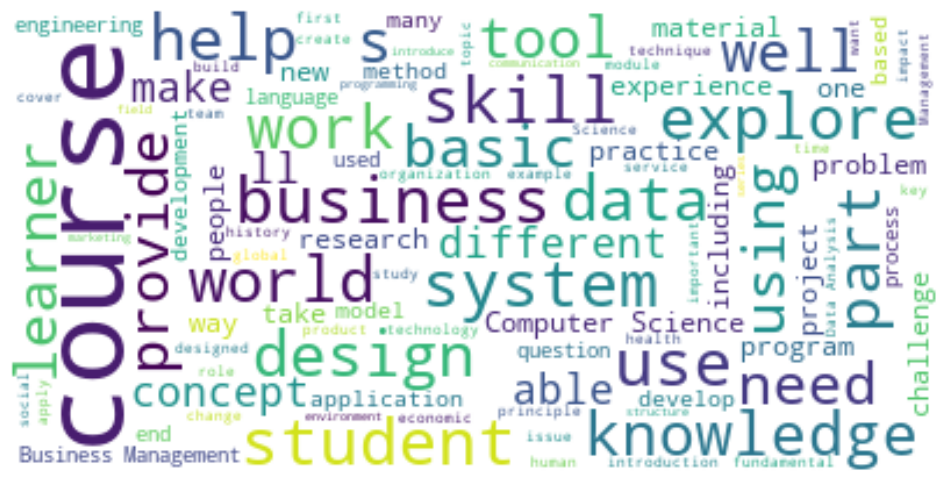

In [31]:
wordcloud = WordCloud(stopwords=stopwords,max_font_size=50, max_words=100, background_color="white").generate(course_description_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [32]:
!pip install universities

In [33]:
import universities

university = universities.API() 

In [34]:
def uni_to_country(x):
    university = universities.API()
    uni = university.lucky(name = x)
    if uni is not None:
        return uni.country
    else:
        return "Not found"

In [35]:
dataset['University'].astype(str)
dataset['Country'] = dataset.University.apply(uni_to_country)


/var/folders/9p/krt4vhn17ls6fxrd79rqftk00000gn/T/ipykernel_7076/2206036506.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Country'] = dataset.University.apply(uni_to_country)


In [36]:
dataset.head(10)

,Name,University,Difficulty Level,Link,About,Course Description,Country
0,How to Learn Online,edX,1,https://www.edx.org/course/how-to-learn-online,Learn essential strategies for successful onli...,"Designed for those who are new to elearning, t...",Not found
1,Programming for Everybody (Getting Started wit...,The University of Michigan,1,https://www.edx.org/course/programming-for-eve...,"This course is a ""no prerequisite"" introductio...",This course aims to teach everyone the basics ...,Not found
2,CS50's Introduction to Computer Science,Harvard University,1,https://www.edx.org/course/cs50s-introduction-...,An introduction to the intellectual enterprise...,"This is CS50x , Harvard University's introduct...",United States
3,The Analytics Edge,Massachusetts Institute of Technology,2,https://www.edx.org/course/the-analytics-edge,"Through inspiring examples and stories, discov...","In the last decade, the amount of data availab...",United States
4,Marketing Analytics: Marketing Measurement Str...,"University of California, Berkeley",1,https://www.edx.org/course/marketing-analytics...,This course is part of a MicroMasters® Program,Begin your journey in a new career in marketin...,United States
5,Introduction to Project Management,University of Adelaide,1,https://www.edx.org/course/introduction-to-pro...,Learn the principles of project management and...,Project management is an essential skill-set f...,Australia
6,Leading High-Performing Teams,The University of Queensland,2,https://www.edx.org/course/leading-high-perfor...,"Learn how to motivate, engage and empower peop...",This course will blend business theory and rea...,Not found
7,The Foundations of Happiness at Work,"University of California, Berkeley",1,https://www.edx.org/course/the-foundations-of-...,Learn why happiness at work matters and how to...,This course explains what happiness at work lo...,United States
8,"Managing Study, Stress and Mental Health at Un...",Curtin University,1,https://www.edx.org/course/managing-study-stre...,Develop a clearer understanding of what mental...,This short course is a German-Australian colla...,Australia
9,Six Sigma: Define and Measure,Technische Universität München,1,https://www.edx.org/course/six-sigma-define-an...,An introduction to the Six Sigma methodology a...,Understand the background and meaning of Six S...,Germany


In [37]:
gp_country = dataset.groupby('Country').count().reset_index()
gp_country.sort_values(by= 'Name',ascending=False, inplace=True)
gp_country.head()

,Country,Name,University,Difficulty Level,Link,About,Course Description
10,Not found,324,324,324,324,324,324
16,United States,262,262,262,262,262,262
0,Australia,35,35,35,35,35,35
9,Netherlands,28,28,28,28,28,28
8,Japan,14,14,14,14,14,14


Text(0.5, 1.0, 'Courses offered by Countries')

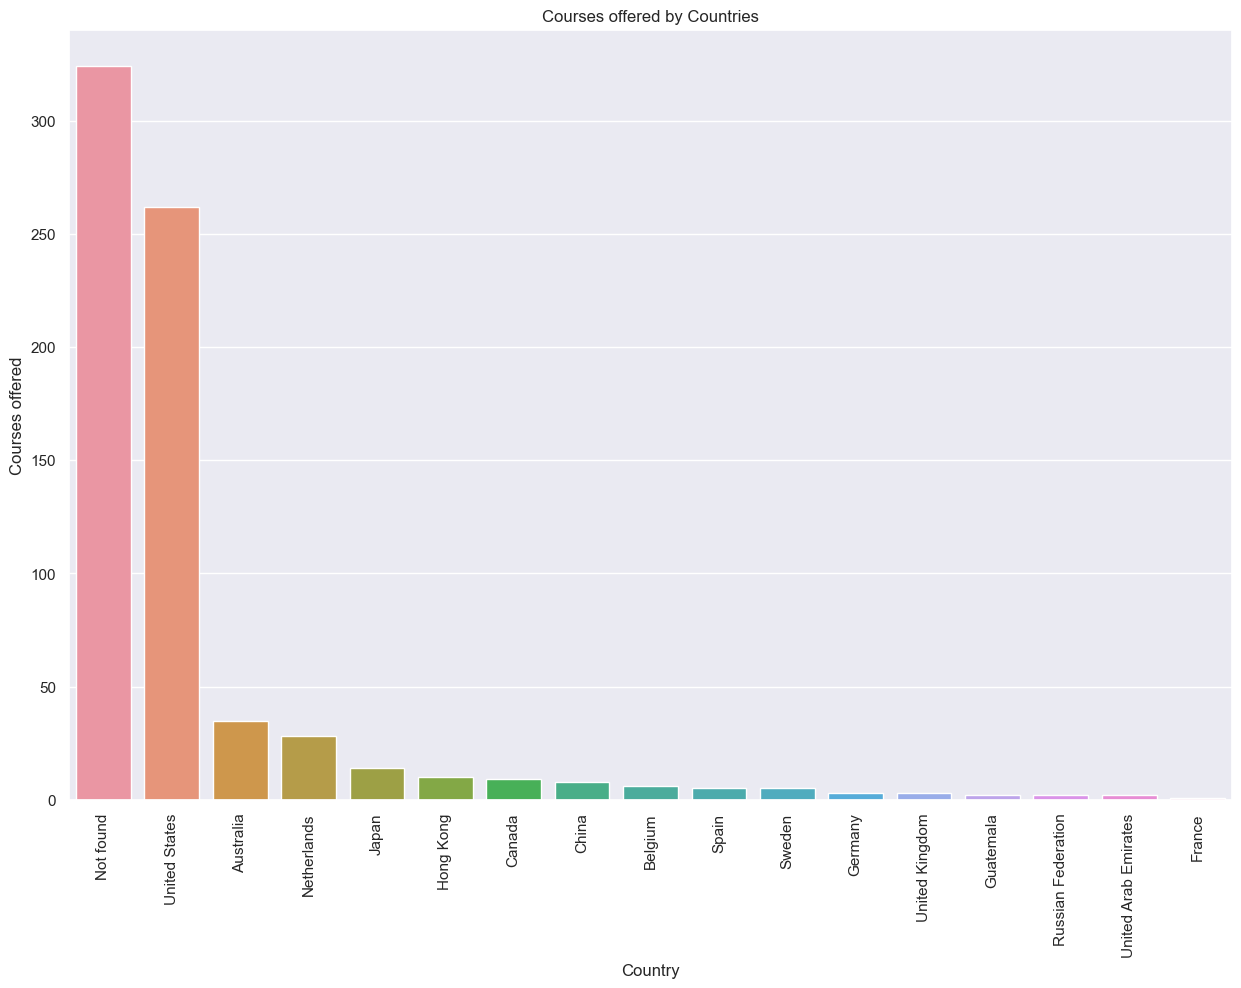

In [38]:
sns.set(rc={'figure.figsize':(15,10)})
fig = plt.figure()
sns.barplot(x='Country', y='Name',data=gp_country)
plt.xticks(rotation=90)
plt.ylabel('Courses offered')
plt.title('Courses offered by Countries')

Text(0.5, 1.0, 'Courses offered by Countries (dropped organization)')

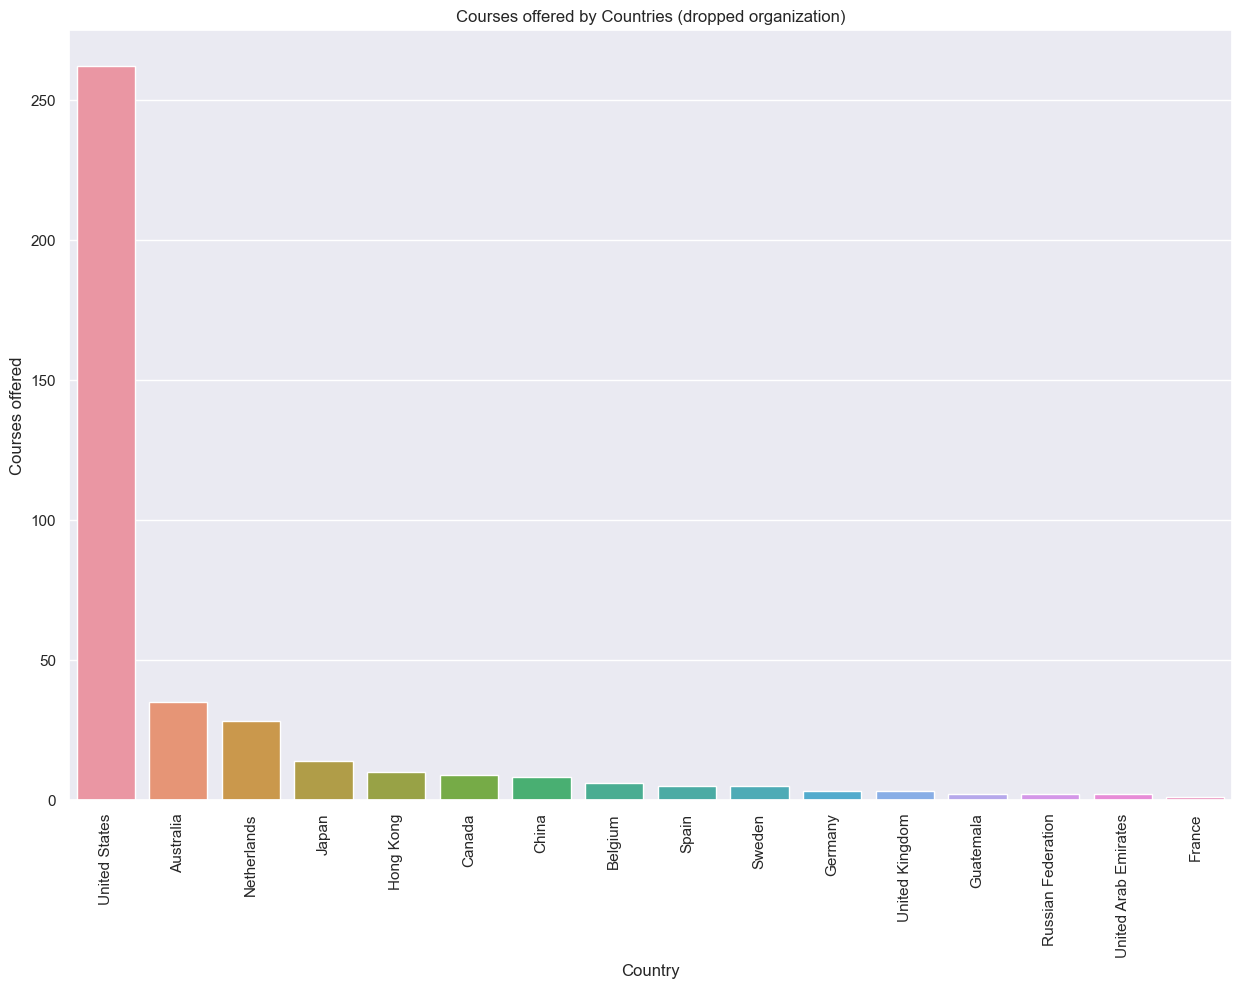

In [39]:
gp_country = gp_country[gp_country.Country != "Not found"]
sns.set(rc={'figure.figsize':(15,10)})
fig = plt.figure()
sns.barplot(x='Country', y='Name',data=gp_country)
plt.xticks(rotation=90)
plt.ylabel('Courses offered')
plt.title('Courses offered by Countries (dropped organization)')

# Content-Based Filtering

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer #term-frequency and inverse document frequency

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
dataset['Course Description'] = dataset['Course Description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(dataset['Course Description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

/var/folders/9p/krt4vhn17ls6fxrd79rqftk00000gn/T/ipykernel_7076/3265701482.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Course Description'] = dataset['Course Description'].fillna('')


(719, 10140)

In [41]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [42]:
#Construct a reverse map of indices and course name
indices = pd.Series(dataset.index, index=dataset['Name']).drop_duplicates()

In [43]:
# Function that takes in course name as input and outputs most similar courses
def get_recommendations(Name, cosine_sim=cosine_sim):
    
    # Get the index of the course that matches the name
    idx = indices[Name]

    # Get the pairwsie similarity scores of all courses with that course
    sim_scores = list(enumerate(cosine_sim[idx]))
        
    # Sort the courses based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar courses
    sim_scores = sim_scores[1:11]
    

    # Get the course indices
    course_indices = [i[0] for i in sim_scores]
    print(course_indices)

    # Return the top 10 most similar courses
    return dataset['Name'].iloc[course_indices]

In [44]:
get_recommendations('The Analytics Edge')

[285, 502, 35, 277, 446, 210, 365, 193, 41, 143]


286          Introduction to Data Analytics for Managers
503                               Big Data and Education
35                                      Statistics and R
278     Data Science: Computational Thinking with Python
447                        Analytics for Decision Making
211    Data Science for Construction, Architecture an...
366                              The Data Science Method
194    Statistical Thinking for Data Science and Anal...
41                           Data Science: Visualization
144                         Visualizing Data with Python
Name: Name, dtype: object

In [45]:
get_recommendations("CS50's Introduction to Computer Science")

[97, 334, 567, 59, 348, 43, 710, 62, 136, 266]


98                      Masterpieces of World Literature
335                         Introduction to Bioconductor
568                                Advanced Bioconductor
59     Tangible Things: Discovering History Through A...
349                  Case Studies in Functional Genomics
43                              The Science of Happiness
711           StudioX: Creating a Course with edX Studio
62                   Basics of Computing and Programming
137                                   Programming Basics
267                             How to Code: Simple Data
Name: Name, dtype: object

In [46]:
get_recommendations("Basics of Computing and Programming")

[187, 305, 466, 16, 1, 173, 136, 107, 31, 184]


188                           Introduction to Networking
306              Computer Hardware and Operating Systems
467                         IoT Programming and Big Data
16                        Python Basics for Data Science
1      Programming for Everybody (Getting Started wit...
174                               Python Data Structures
137                                   Programming Basics
108                       C Programming: Getting Started
31                             Using Python for Research
185                  C Programming: Language Foundations
Name: Name, dtype: object

In [47]:
get_recommendations("Python Basics for Data Science")

[173, 31, 308, 466, 1, 143, 277, 62, 192, 75]


174                               Python Data Structures
31                             Using Python for Research
309                                  Analytics in Python
467                         IoT Programming and Big Data
1      Programming for Everybody (Getting Started wit...
144                         Visualizing Data with Python
278     Data Science: Computational Thinking with Python
62                   Basics of Computing and Programming
193                                   Data Science Tools
75                            Analyzing Data with Python
Name: Name, dtype: object